In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from deepsudoku import REPO_PATH

os.chdir(REPO_PATH)

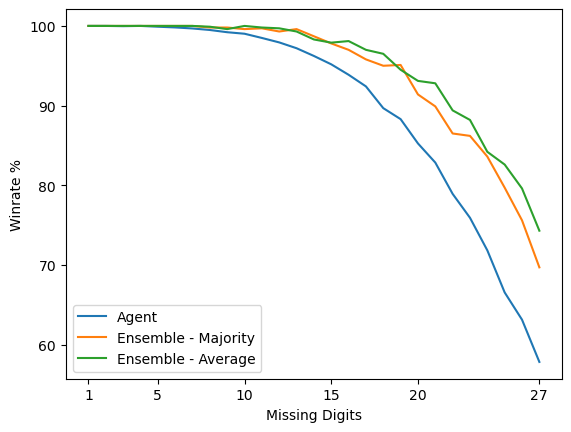

In [20]:
normal_model = pd.read_json("stats/winrate_against_missing_digits_10000_games.json", typ = "Series")
ensemble_average = pd.read_json("stats/winrate_against_missing_digits_ensemble_average_small_1000_games.json", typ = "Series")
ensemble_majority = pd.read_json("stats/winrate_against_missing_digits_ensemble_majority_small_1000_games.json", typ = "Series")

x = np.arange(1, 28)
plt.plot(x, normal_model.values * 100, label = "Agent")
plt.plot(x, ensemble_majority.values * 100, label = "Ensemble - Majority")
plt.plot(x, ensemble_average.values * 100, label = "Ensemble - Average")

plt.ylabel("Winrate %")
plt.xlabel("Missing Digits")

ticks = [1,5,10,15,20,27]
plt.xticks(ticks, ticks)
plt.legend()
plt.show()